<a href="https://colab.research.google.com/github/NicolasLopes7/predict-covid/blob/master/BrazilnorthestData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [50]:
df = pd.read_csv('https://brasil.io/dataset/covid19/caso?format=csv')
df.tail()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
10516,2020-02-27,SP,São Paulo,city,1,NaN,False,12252023.0,3550308.0,0.00816,NaN
10517,2020-02-27,SP,NaN,state,1,0.0,False,45919049.0,35.0,0.00218,NaN
10518,2020-02-26,SP,NaN,state,1,0.0,False,45919049.0,35.0,0.00218,NaN
10519,2020-02-25,SP,São Paulo,city,1,NaN,False,12252023.0,3550308.0,0.00816,NaN
10520,2020-02-25,SP,NaN,state,1,0.0,False,45919049.0,35.0,0.00218,NaN


In [61]:
estados = df.loc[ df.place_type == "state" , : ]
estados.head()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
92,2020-04-11,MG,NaN,state,750,17.0,True,21168791.0,31.0,3.54295,0.0227
98,2020-04-10,AC,NaN,state,70,2.0,True,881935.0,12.0,7.93709,0.0286
104,2020-04-10,AL,NaN,state,45,3.0,True,3337357.0,27.0,1.34837,0.0667
122,2020-04-10,AM,NaN,state,981,50.0,True,4144597.0,13.0,23.66937,0.0510
126,2020-04-10,AP,NaN,state,166,2.0,True,845731.0,16.0,19.62799,0.0120


In [52]:
data = estados[['date', 'state', 'confirmed', 'deaths', 'is_last']]
data.head()

,date,state,confirmed,deaths,is_last
92,2020-04-11,MG,750,17.0,True
98,2020-04-10,AC,70,2.0,True
104,2020-04-10,AL,45,3.0,True
122,2020-04-10,AM,981,50.0,True
126,2020-04-10,AP,166,2.0,True


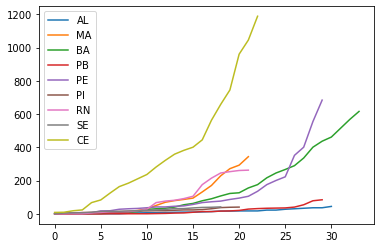

In [64]:
def sinceFirstCase(data, estados, situacao):
  covid = pd.DataFrame()
  for estado in estados:
    try:
      df_estado = data.loc[data.state == estado, : ]
      df_estado = df_estado.groupby('date').sum()[situacao].reset_index()

      df_estado = df_estado.drop('date', axis = 1)
      df_estado.columns = [estado]
      covid = pd.concat([covid, df_estado], ignore_index=False, axis=1)
    except:
      print('error')

  covid.columns = estados
  return covid

df_estados = sinceFirstCase(data, ['AL', 'MA','BA', 'PB', 'PE', 'PI',
                                   'RN','SE','CE'], 'confirmed')
df_estados.plot()